<a href="https://colab.research.google.com/github/mr-cri-spy/Deep-Learning-projects/blob/main/RNN_Google_Stock_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
data_train = pd.read_csv("/content/Google_Stock_Price_Train.csv")
data_train.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [ ]:
data_train.tail()

,Date,Open,High,Low,Close,Volume
1253,12/23/2016,790.90,792.74,787.28,789.91,"623,400"
1254,12/27/2016,790.68,797.86,787.66,791.55,"789,100"
1255,12/28/2016,793.70,794.23,783.20,785.05,"1,153,800"
1256,12/29/2016,783.33,785.93,778.92,782.79,"744,300"
1257,12/30/2016,782.75,782.78,770.41,771.82,"1,770,000"


In [ ]:
train_set = data_train[['Open']]
train_set.head()

,Open
0,325.25
1,331.27
2,329.83
3,328.34
4,322.04


In [ ]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler(feature_range=(0,1))
train_set = mms.fit_transform(train_set)
train_set

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

In [ ]:
### Divide data into timesteps
## data = [200,100,50,90,10]
## timestep = 2 days
## xtrain = [[200,100],[100,50],[50,90]]
## ytrain = [50,90,10]

In [ ]:
xtrain = []
ytrain = []
for i in range(60, len(data_train)):
  xtrain.append(train_set[i-60:i,0])
  ytrain.append(train_set[i,0])

In [ ]:
xtrain,ytrain = np.array(xtrain),np.array(ytrain)

In [ ]:
print(xtrain.shape)
print(ytrain.shape)

(1198, 60)
(1198,)


In [ ]:
xtrain = xtrain.reshape(xtrain.shape[0],xtrain.shape[1],1)
print(xtrain.shape)

(1198, 60, 1)


In [ ]:
import keras as tf

In [ ]:
model = tf.models.Sequential()
model.add(tf.layers.SimpleRNN(64,input_shape=(60,1),activation="tanh",return_sequences=False))
model.add(tf.layers.Dropout(0.2))
model.add(tf.layers.Dense(1))

model.compile(loss="mean_squared_error",optimizer="adam")

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.fit(xtrain,ytrain,epochs=100)

Epoch 1/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0626
Epoch 2/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0123
Epoch 3/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0076
Epoch 4/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0062
Epoch 5/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0052
Epoch 6/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0046
Epoch 7/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0039
Epoch 8/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0037
Epoch 9/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0034
Epoch 10/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0030
Epoch 11/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0035
Epoch 12/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0028
Epoch 13/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0026
Epoch 14/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0027
Epoch 15/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - lo

In [ ]:
data_test = pd.read_csv("/content/Google_Stock_Price_Test.csv")
data_test.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2017,778.81,789.63,775.80,786.14,"1,657,300"
1,1/4/2017,788.36,791.34,783.16,786.90,"1,073,000"
2,1/5/2017,786.08,794.48,785.02,794.02,"1,335,200"
3,1/6/2017,795.26,807.90,792.20,806.15,"1,640,200"
4,1/9/2017,806.40,809.97,802.83,806.65,"1,272,400"


In [ ]:
actual_stock_price = data_test[['Open']]
actual_stock_price.head()

,Open
0,778.81
1,788.36
2,786.08
3,795.26
4,806.40


In [ ]:
dataset_total = pd.concat((data_train['Open'],data_test['Open']),axis=0)
dataset_total

,Open
0,325.25
1,331.27
2,329.83
3,328.34
4,322.04
...,...
15,829.62
16,837.81
17,834.71
18,814.66


In [ ]:
inputs = dataset_total[len(dataset_total)-len(data_test)-60:].values
inputs

array([779.  , 779.66, 777.71, 786.66, 783.76, 781.22, 781.65, 779.8 ,
       787.85, 798.24, 803.3 , 795.  , 804.9 , 816.68, 806.34, 801.  ,
       808.35, 795.47, 782.89, 778.2 , 767.25, 750.66, 774.5 , 783.4 ,
       779.94, 791.17, 756.54, 755.6 , 746.97, 755.2 , 766.92, 771.37,
       762.61, 772.63, 767.73, 764.26, 760.  , 771.53, 770.07, 757.44,
       744.59, 757.71, 764.73, 761.  , 772.48, 780.  , 785.04, 793.9 ,
       797.4 , 797.34, 800.4 , 790.22, 796.76, 795.84, 792.36, 790.9 ,
       790.68, 793.7 , 783.33, 782.75, 778.81, 788.36, 786.08, 795.26,
       806.4 , 807.86, 805.  , 807.14, 807.48, 807.08, 805.81, 805.12,
       806.91, 807.25, 822.3 , 829.62, 837.81, 834.71, 814.66, 796.86])

In [ ]:
inputs = inputs.reshape(inputs.shape[0],1)
inputs = mms.transform(inputs)
inputs

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


array([[0.9299055 ],
       [0.93113327],
       [0.92750577],
       [0.94415507],
       [0.93876032],
       [0.93403527],
       [0.93483518],
       [0.9313937 ],
       [0.94636878],
       [0.96569685],
       [0.97510976],
       [0.95966962],
       [0.97808617],
       [1.        ],
       [0.98076494],
       [0.97083116],
       [0.98450406],
       [0.96054394],
       [0.9371419 ],
       [0.92841729],
       [0.90804747],
       [0.8771858 ],
       [0.92153434],
       [0.93809063],
       [0.93165414],
       [0.95254483],
       [0.88812412],
       [0.88637547],
       [0.87032145],
       [0.88563137],
       [0.90743359],
       [0.91571173],
       [0.89941588],
       [0.91805566],
       [0.9089404 ],
       [0.9024853 ],
       [0.89456061],
       [0.91600938],
       [0.9132934 ],
       [0.88979835],
       [0.86589404],
       [0.89030062],
       [0.90335962],
       [0.89642086],
       [0.91777662],
       [0.93176576],
       [0.94114145],
       [0.957

In [ ]:
xtest = []
for i in range(60,len(inputs)):
  xtest.append(inputs[i-60:i,0])

In [ ]:
xtest = np.array(xtest)
xtest.shape

(20, 60)

In [ ]:
pred_stock_price = model.predict(xtest)
pred_stock_price = mms.inverse_transform(pred_stock_price)
pred_stock_price

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 311ms/step


array([[781.1022 ],
       [779.8758 ],
       [785.6125 ],
       [789.4284 ],
       [792.517  ],
       [802.5308 ],
       [808.14844],
       [803.24054],
       [803.4932 ],
       [807.0996 ],
       [807.08997],
       [806.03906],
       [803.4956 ],
       [803.56903],
       [807.53595],
       [817.2863 ],
       [826.3086 ],
       [836.7909 ],
       [835.7587 ],
       [817.44824]], dtype=float32)

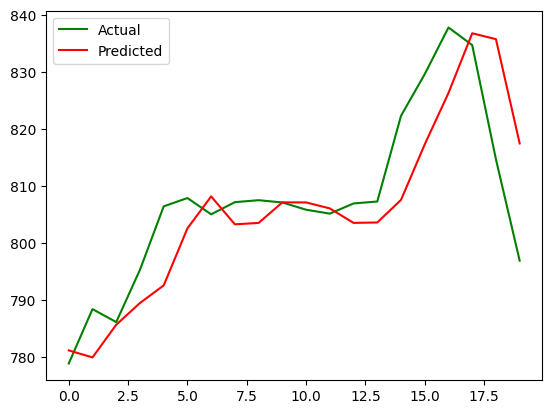

In [ ]:
plt.plot(actual_stock_price,color="green",label="Actual")
plt.plot(pred_stock_price,color="red",label="Predicted")
plt.legend()
plt.show()